## Installing required packages 

In [ ]:
!pip install PyPDF2
!pip install transformers
!pip install gensim
!pip install pdfminer
!pip install nltk
!pip install openpyxl
!pip install dask
!pip install pandas
!pip install numpy
!pip install dask
!pip install dask_ml

In [1]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from PyPDF2 import PdfReader #pypdf2-2.11.0
import pandas as pd
pd.options.display.max_rows
pd.options.display.max_columns
pd.options.display.max_colwidth
pd.options.display.max_info_columns
pd.options.display.precision
pd.options.display.float_format
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from collections import Counter
import re
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO
import sys
from keras.layers import Embedding, LSTM, Dense
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import array_to_img
import torch
from transformers import BertModel, BertTokenizer
import PyPDF2
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples
from transformers import AutoTokenizer, AutoModel
from sklearn.decomposition import TruncatedSVD
import gensim
from gensim.corpora import Dictionary
from keras_preprocessing.text import one_hot
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Embedding
from pdfminer.converter import HTMLConverter
from pdfminer.pdfpage import PDFPage
from io import BytesIO
from gensim.models import Word2Vec
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import adjusted_rand_score
import nltk
import requests
import dask.dataframe as dd
import dask.array as da
import dask_ml.feature_extraction.text as dask_text
from dask_ml.decomposition import TruncatedSVD
import dask
from dask import delayed
from dask import compute
from dask.distributed import Client
from dask_ml.feature_extraction.text import HashingVectorizer

c:\Users\niman\Documents\nj_code\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Deciding Dataset - ArXiv json

In [ ]:
import json

data = []
with open('/home/jovyan/pdf_to_vec/arxiv-metadata-oai-snapshot.json') as f:
    for i, line in enumerate(f):
        if i >= 10000:  # stop reading file after 10000 lines
            break
        data.append(json.loads(line))

# Convert the JSON data to a DataFrame
df = pd.DataFrame(data)
df['pdf_links'] = 'https://arxiv.org/pdf/' + df['id'] + '.pdf'
df=df[['id','title','categories', 'pdf_links']]
print(df.shape)

# Dask Programming

In [ ]:
import pandas as pd
import dask.dataframe as dd

# Read the Excel file, skipping the first 4000 rows and reading the next 1000 rows
df = pd.read_excel('/home/jovyan/thesis/10k.xlsx', skiprows=6000, nrows=1000,index_col=0)

# Convert the Pandas DataFrame to a Dask DataFrame with 4 partitions
ddf = dd.from_pandas(df, npartitions=4)

# Compute the Dask DataFrame into a Pandas DataFrame
df = ddf.compute()

# Rename the columns of the DataFrame

# Get the shape of the DataFrame

In [ ]:
df.columns = ['id', 'title', 'categories', 'pdf_links']

# Preparing Dataset

In [ ]:
import pandas as pd
import dask.dataframe as dd


# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(r'C:\Users\niman\Documents\nj_code\json_data.xlsx', skiprows=7000,nrows=3000)

# Convert the Pandas DataFrame to a Dask DataFrame
ddf = dd.from_pandas(df, npartitions=1)

# Compute the Dask DataFrame into a Pandas DataFrame
df= ddf.compute()

df.shape

In [ ]:
import io
import requests
from PyPDF2 import PdfReader, PdfFileWriter
import time
import dask.dataframe as dd  #dask-2023.3.0

def get_text(url):
    start_time = time.time()

    try:
        r = requests.get(url)
        f = io.BytesIO(r.content)

        reader = PdfReader(f)
        if len(reader.pages) >= 3:
            contents = reader.pages[2].extract_text().split('\n')
            reader.stream.close()
            elapsed_time = time.time() - start_time
            print(f"Successfully fetched text from {url} in {elapsed_time:.2f} seconds")

        else:
            elapsed_time = time.time() - start_time
            print(f"Request to {url} failed with status code {response.status_code} in {elapsed_time:.2f} seconds")
            contents = None

    except requests.exceptions.RequestException as e:
        elapsed_time = time.time() - start_time
        print(f"Request to {url} failed with error {e} in {elapsed_time:.2f} seconds")
        contents = None
        time.sleep(10) # wait for 10 seconds before trying again

    except Exception as e:
        if "EOF marker not found" in str(e):
            elapsed_time = time.time() - start_time
            print(f"Error reading PDF from {url}: {e} in {elapsed_time:.2f} seconds")
            contents = None
        elif "No /Root object!" in str(e):
            elapsed_time = time.time() - start_time
            print(f"Error reading PDF from {url}: {e} in {elapsed_time:.2f} seconds")
            contents = None
        else:
            elapsed_time = time.time() - start_time
            print(f"Error reading PDF from {url}: {e} in {elapsed_time:.2f} seconds")
            contents = None
        time.sleep(10) # wait for 10 seconds before trying again
            
    time.sleep(10) # wait for 1 second before returning the result
    return contents

# Load your dataframe as a Dask dataframe
ddf = dd.from_pandas(df, npartitions=4)

# Apply the get_text function to the 'pdf_links' column in parallel using Dask
ddf['pdftext'] = ddf['pdf_links'].apply(get_text, meta=('pdftext', 'object'))

# Trigger the computation and retrieve the result as a Pandas dataframe
result = ddf.compute()


In [ ]:
df0=pd.read_excel(r'C:\Users\niman\Documents\nj_code\text_0to1000.xlsx')
df1001=pd.read_excel(r'C:\Users\niman\Documents\nj_code\text_1001to2000.xlsx')
df2001=pd.read_excel(r'C:\Users\niman\Documents\nj_code\text_2001to3000.xlsx')
df3001=pd.read_excel(r'C:\Users\niman\Documents\nj_code\text_3001to4000.xlsx')
df4001=pd.read_excel(r'C:\Users\niman\Documents\nj_code\text_4001to5000.xlsx')
df5001=pd.read_excel(r'C:\Users\niman\Documents\nj_code\text_5001to6000.xlsx')
df6001=pd.read_excel(r'C:\Users\niman\Documents\nj_code\text_6001to7000.xlsx')
df7001=pd.read_excel(r'C:\Users\niman\Documents\nj_code\text_7001to10k.xlsx')

In [ ]:
frames = [df0,df1001,df2001,df3001,df4001,df5001,df6001,df7001]
result = pd.concat(frames)

In [ ]:
df=result.copy()

In [ ]:
df.to_json('path/to/output.json', orient='records')

# Data Cleaning

In [15]:
df01=pd.read_excel(r'C:\Users\niman\Documents\nj_code\final_df.xlsx')

In [20]:
df01

,Unnamed: 0,id,title,categories,pdf_links,pdftext,text_length,category_codes
0,0,704.0001,Calculation of prompt diphoton production cros...,hep-ph,https://arxiv.org/pdf/0704.0001.pdf,arXiv:0704.0001v2 [hep-ph] 24 Jul 2007\n/BT/...,34867,0
1,1,704.0002,Sparsity-certifying Graph Decompositions,math.CO cs.CG,https://arxiv.org/pdf/0704.0002.pdf,Sparsity-certifying Graph Decompositions\nIlea...,33121,1
2,2,704.0003,The evolution of the Earth-Moon system based o...,physics.gen-ph,https://arxiv.org/pdf/0704.0003.pdf,The evolution of the Ear th-Moon system based ...,31232,2
3,3,704.0004,A determinant of Stirling cycle numbers counts...,math.CO,https://arxiv.org/pdf/0704.0004.pdf,arXiv:0704.0004v1 [math.CO] 31 Mar 2007A Det...,18312,3
4,4,704.0005,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,math.CA math.FA,https://arxiv.org/pdf/0704.0005.pdf,arXiv:0704.0005v1 [math.CA] 2 Apr 2007FROM D...,16817,4
...,...,...,...,...,...,...,...,...
7079,2537,706.0851,Electroweak measurements at the Tevatron,hep-ex,https://arxiv.org/pdf/0706.0851.pdf,"['Boson Rapidity, |y|0 0.5 1 1.5 2 2.5 3/dyσ d...",1926,14
7080,2538,706.0852,Searches for Particle Dark Matter with the GLA...,astro-ph,https://arxiv.org/pdf/0706.0852.pdf,"['2 The Large Area Telescope of GLAST', 'GLAST...",2705,8
7081,2539,706.0853,Controlling the polarisation correlation of ph...,quant-ph,https://arxiv.org/pdf/0706.0853.pdf,"[' ', '3 ', '025 50 75 100 ', '234', '1.20 1....",5367,76
7082,2540,706.0854,On the zero set of the Kobayashi--Royden pseud...,math.CV,https://arxiv.org/pdf/0706.0854.pdf,['THE KOBAYASHI–ROYDEN PSEUDOMETRIC OF THE SPE...,2018,81


In [27]:
df01['pdftext'][2]

"The evolution of the Ear th-Moon system based on  \nthe dark matter field fluid model \n \nHongjun  Pan \nDepartment of Chemistry \nUniversity of North Texas, Denton, Texas 76203, U. S. A. \n \n Abstract \nThe evolution of Earth-Moon system is described by the dark matter field fluid \nmodel with a non-Newtonian appr oach proposed in the Meeting of Division of Particle \nand Field 2004, American Physical Society. The current behavior of the Earth-Moon \nsystem agrees with this model very well and the general pattern of the evolution of the \nMoon-Earth system described by this model agrees with geological and fossil evidence. \nThe closest distance of the Moon to Earth was about 259000 km  at 4.5 billion years ago, \nwhich is far beyond the Roche’s limit. The resu lt suggests that the tidal friction may not \nbe the primary cause for the evolution of the Earth-Moon system. The average dark \nmatter field fluid constant derived from  Earth-Moon system data is 4.39 × 10-22 s-1m-1. \nThi

In [25]:
len(df01['pdftext'][0])

32767

In [24]:
len(df01['pdftext'][2])

31232

In [29]:
import pandas as pd
pd.options.display.max_rows
pd.options.display.max_columns
pd.options.display.max_colwidth
pd.options.display.max_info_columns
pd.options.display.precision
pd.options.display.float_format

In [ ]:
# Assuming your data is stored in a pandas DataFrame with a column called 'pdftext'
df['pdftext'] = df['pdftext'].fillna('')  # Replace any NaN values with an empty string
df['text_length'] = df['pdftext'].apply(lambda x: len(str(x)))  # Convert all values to string and calculate length

In [ ]:
df = df[df['text_length'] >= 100]  

In [ ]:
df=df[['id','title','categories','pdf_links','pdftext','text_length']]

In [30]:
# Assuming your data is stored in a pandas DataFrame called 'df'
categories = df['categories'].unique()
print(categories)


['hep-ph' 'math.CO cs.CG' 'physics.gen-ph' ...
 'cond-mat.other math-ph math.MP'
 'math.AG math-ph math.AP math.CA math.DS math.MP'
 'math.RA math.AG math.RT']


In [36]:
len(df['category_codes'].unique())

1154

In [31]:
# Assuming your data is stored in a pandas DataFrame called 'df'
df['category_codes'], categories = df['categories'].fillna('missing').factorize()
print(categories)
print(df['category_codes'].unique())

Index(['hep-ph', 'math.CO cs.CG', 'physics.gen-ph', 'math.CO',
       'math.CA math.FA', 'cond-mat.mes-hall', 'gr-qc', 'cond-mat.mtrl-sci',
       'astro-ph', 'math.NT math.AG',
       ...
       'hep-th cond-mat.stat-mech math-ph math.MP math.QA math.RT',
       'q-bio.QM math-ph math.CO math.MP q-bio.BM',
       'quant-ph cond-mat.other hep-th math-ph math.CA math.MP nlin.SI',
       'quant-ph cond-mat.other hep-th', 'stat.CO', 'math.AT math.GT',
       'math-ph math.MP math.ST stat.TH', 'cond-mat.other math-ph math.MP',
       'math.AG math-ph math.AP math.CA math.DS math.MP',
       'math.RA math.AG math.RT'],
      dtype='object', length=1172)
[   0    1    2 ... 1169 1170 1171]


In [ ]:
import pandas as pd
from langdetect import detect

# Detect language of text
df['language'] = df['pdftext'].apply(lambda x: detect(x))

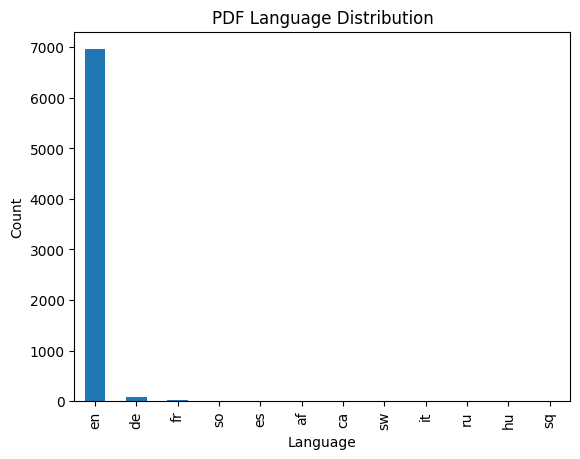

In [32]:
# Create a bar plot of the language distribution
df['language'].value_counts().plot(kind='bar')

# Set plot title and axis labels
plt.title('PDF Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')

# Show plot
plt.show()

In [33]:
non_english = df.loc[df['language'] != 'en']
print('Deleting non-English PDFs:')
print(non_english['pdf_links'])

# Drop non-English rows from DataFrame
df = df.loc[df['language'] == 'en']

Deleting non-English PDFs:
0       https://arxiv.org/pdf/0704.0001.pdf
128     https://arxiv.org/pdf/0704.0129.pdf
174     https://arxiv.org/pdf/0704.0176.pdf
210     https://arxiv.org/pdf/0704.0212.pdf
249     https://arxiv.org/pdf/0704.0252.pdf
                       ...                 
6902    https://arxiv.org/pdf/0706.0671.pdf
6924    https://arxiv.org/pdf/0706.0694.pdf
6976    https://arxiv.org/pdf/0706.0747.pdf
6982    https://arxiv.org/pdf/0706.0753.pdf
7031    https://arxiv.org/pdf/0706.0802.pdf
Name: pdf_links, Length: 124, dtype: object


In [34]:
len(non_english['pdf_links'])

124

# temp

In [2]:
import pandas as pd

# Read the JSON file into a dataframe
df = pd.read_json(r"C:\Users\niman\Documents\nj_code\vec.json")

df.head()

,level_0,index,id,title,categories,pdf_links,pdftext,text_length,category_codes,tokens,cleaned_tokens,stemmed_tokens,lemmatized_tokens,bow_vectors,tfidf_vectors,language,RNN vectors,sentences,LSA vectors,Encoded Categories
0,0,0,704.0001,Calculation of prompt diphoton production cros...,hep-ph,https://arxiv.org/pdf/0704.0001.pdf,arXiv:0704.0001v2 [hep-ph] 24 Jul 2007\n/BT/...,34867,0,"['arXiv:0704.0001v2', '[', 'hep-ph', ']', '24'...","['jul', 'h', 'αs', 'π', 'αs', 'direct', 'gg', ...","['jul', 'h', 'αs', 'π', 'αs', 'direct', 'gg', ...","['jul', 'h', 'αs', 'π', 'αs', 'direct', 'gg', ...",[0 0 0 ... 0 0 0],[0. 0. 0. ... 0. 0. 0.],de,"[0.0014945045, -0.0246268511, -0.0345960148, -...",[arXiv:0704.0001v2 [hep-ph] 24 Jul 2007\n/BT...,"[0.00044752750000000003, 0.0004475275000000000...",365
1,1,1,704.0002,Sparsity-certifying Graph Decompositions,math.CO cs.CG,https://arxiv.org/pdf/0704.0002.pdf,Sparsity-certifying Graph Decompositions\nIlea...,33121,1,"['Sparsity-certifying', 'Graph', 'Decompositio...","['graph', 'decompositions', 'ileana', 'louis',...","['graph', 'decomposit', 'ileana', 'loui', 'com...","['graph', 'decomposition', 'ileana', 'louis', ...",[0 0 0 ... 0 0 0],[0. 0. 0. ... 0. 0. 0.],en,"[0.013712313, -0.0367475748, 0.03766248, -0.02...",[Sparsity-certifying Graph Decompositions\nIle...,"[0.0143767267, 0.000988273, 0.0143767267, 0.01...",561
2,2,2,704.0003,The evolution of the Earth-Moon system based o...,physics.gen-ph,https://arxiv.org/pdf/0704.0003.pdf,The evolution of the Ear th-Moon system based ...,31232,2,"['The', 'evolution', 'of', 'the', 'Ear', 'th-M...","['evolution', 'ear', 'system', 'based', 'dark'...","['evolut', 'ear', 'system', 'base', 'dark', 'm...","['evolution', 'ear', 'system', 'based', 'dark'...",[0 0 0 ... 0 0 0],[0. 0. 0. ... 0. 0. 0.],en,"[-0.039867483100000004, 0.0259359218, 1.57841e...",[The evolution of the Ear th-Moon system based...,"[0.0004590884, 0.0101714478, 0.0101714478, 0.0...",984
3,3,3,704.0004,A determinant of Stirling cycle numbers counts...,math.CO,https://arxiv.org/pdf/0704.0004.pdf,arXiv:0704.0004v1 [math.CO] 31 Mar 2007A Det...,18312,3,"['arXiv:0704.0004v1', '[', 'math.CO', ']', '31...","['mar', 'determinant', 'stirling', 'cycle', 'n...","['mar', 'determin', 'stirl', 'cycl', 'number',...","['mar', 'determinant', 'stirling', 'cycle', 'n...",[0 0 0 ... 0 0 0],[0. 0. 0. ... 0. 0. 0.],en,"[-0.0340844765, -0.0400714166, 0.0251507498, 0...",[arXiv:0704.0004v1 [math.CO] 31 Mar 2007A De...,"[4.5672000000000006e-05, 4.5672000000000006e-0...",560
4,4,4,704.0005,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,math.CA math.FA,https://arxiv.org/pdf/0704.0005.pdf,arXiv:0704.0005v1 [math.CA] 2 Apr 2007FROM D...,16817,4,"['arXiv:0704.0005v1', '[', 'math.CA', ']', '2'...","['apr', 'dyadic', 'λαtoλα', 'wael', 'alberto',...","['apr', 'dyadic', 'λαtoλα', 'wael', 'alberto',...","['apr', 'dyadic', 'λαtoλα', 'wael', 'alberto',...",[0 0 0 ... 0 0 0],[0. 0. 0. ... 0. 0. 0.],en,"[0.0372919776, 0.038389992000000005, -0.019792...",[arXiv:0704.0005v1 [math.CA] 2 Apr 2007FROM ...,"[0.0020720194, 0.0020720194, 0.0007857609, 0.0...",554


In [3]:
df.columns

Index(['level_0', 'index', 'id', 'title', 'categories', 'pdf_links', 'pdftext',
       'text_length', 'category_codes', 'tokens', 'cleaned_tokens',
       'stemmed_tokens', 'lemmatized_tokens', 'bow_vectors', 'tfidf_vectors',
       'language', 'RNN vectors', 'sentences', 'LSA vectors',
       'Encoded Categories'],
      dtype='object')

In [4]:
df.shape

(7084, 20)

In [56]:
df=df[['id', 'title', 'categories', 'Encoded Categories','pdf_links', 'pdftext',
       'text_length', 'tokens', 'cleaned_tokens',
       'stemmed_tokens', 'lemmatized_tokens', 
       'language', 'sentences',  'RNN vectors','LSA vectors'
      ]]

In [47]:
df1=df[['id', 'title', 'categories', 'Encoded Categories', 'pdf_links', 'pdftext',
       'text_length', 'tokens', 'cleaned_tokens',
       'stemmed_tokens', 'lemmatized_tokens', 
       'language'
      ]]

In [48]:
df1.shape

(6960, 12)

In [49]:
df1.to_json('extracted_pdf.json', orient='records')

In [37]:
df.shape

(6960, 20)

In [38]:
pattern = r"arXiv:\d+[-a-z]*(v\d+)? \[[^\]]*\] \d{1,2} [A-Za-z]{3} \d{4}.+"

# Apply the regular expression pattern to all rows in the pdftext column
df['is_match'] = df['pdftext'].apply(lambda x: bool(re.match(pattern, x)))

In [46]:
df['pdftext'][1]

"Sparsity-certifying Graph Decompositions\nIleana Streinu1_x0003_, Louis Theran2\n1Department of Computer Science, Smith College, Northampton, MA. e-mail: streinu@cs.smith.edu\n2Department of Computer Science, University of Massachusetts Amherst. e-mail: theran@cs.umass.edu\nAbstract. We describe a new algorithm, the (k;`)-pebble game with colors, and use it to obtain a charac-\nterization of the family of (k;`)-sparse graphs and algorithmic solutions to a family of problems concern-\ning tree decompositions of graphs. Special instances of sparse graphs appear in rigidity theory and have\nreceived increased attention in recent years. In particular, our colored pebbles generalize and strengthen\nthe previous results of Lee and Streinu [12] and give a new proof of the Tutte-Nash-Williams characteri-\nzation of arboricity. We also present a new decomposition that certiﬁes sparsity based on the (k;`)-pebble\ngame with colors. Our work also exposes connections between pebble game algorithms

In [39]:
df

,level_0,index,id,title,categories,pdf_links,pdftext,text_length,category_codes,tokens,...,stemmed_tokens,lemmatized_tokens,bow_vectors,tfidf_vectors,language,RNN vectors,sentences,LSA vectors,Encoded Categories,is_match
1,1,1,704.0002,Sparsity-certifying Graph Decompositions,math.CO cs.CG,https://arxiv.org/pdf/0704.0002.pdf,Sparsity-certifying Graph Decompositions\nIlea...,33121,1,"['Sparsity-certifying', 'Graph', 'Decompositio...",...,"['graph', 'decomposit', 'ileana', 'loui', 'com...","['graph', 'decomposition', 'ileana', 'louis', ...",[0 0 0 ... 0 0 0],[0. 0. 0. ... 0. 0. 0.],en,"[0.013712313, -0.0367475748, 0.03766248, -0.02...",[Sparsity-certifying Graph Decompositions\nIle...,"[0.0143767267, 0.000988273, 0.0143767267, 0.01...",561,False
2,2,2,704.0003,The evolution of the Earth-Moon system based o...,physics.gen-ph,https://arxiv.org/pdf/0704.0003.pdf,The evolution of the Ear th-Moon system based ...,31232,2,"['The', 'evolution', 'of', 'the', 'Ear', 'th-M...",...,"['evolut', 'ear', 'system', 'base', 'dark', 'm...","['evolution', 'ear', 'system', 'based', 'dark'...",[0 0 0 ... 0 0 0],[0. 0. 0. ... 0. 0. 0.],en,"[-0.039867483100000004, 0.0259359218, 1.57841e...",[The evolution of the Ear th-Moon system based...,"[0.0004590884, 0.0101714478, 0.0101714478, 0.0...",984,False
3,3,3,704.0004,A determinant of Stirling cycle numbers counts...,math.CO,https://arxiv.org/pdf/0704.0004.pdf,arXiv:0704.0004v1 [math.CO] 31 Mar 2007A Det...,18312,3,"['arXiv:0704.0004v1', '[', 'math.CO', ']', '31...",...,"['mar', 'determin', 'stirl', 'cycl', 'number',...","['mar', 'determinant', 'stirling', 'cycle', 'n...",[0 0 0 ... 0 0 0],[0. 0. 0. ... 0. 0. 0.],en,"[-0.0340844765, -0.0400714166, 0.0251507498, 0...",[arXiv:0704.0004v1 [math.CO] 31 Mar 2007A De...,"[4.5672000000000006e-05, 4.5672000000000006e-0...",560,False
4,4,4,704.0005,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,math.CA math.FA,https://arxiv.org/pdf/0704.0005.pdf,arXiv:0704.0005v1 [math.CA] 2 Apr 2007FROM D...,16817,4,"['arXiv:0704.0005v1', '[', 'math.CA', ']', '2'...",...,"['apr', 'dyadic', 'λαtoλα', 'wael', 'alberto',...","['apr', 'dyadic', 'λαtoλα', 'wael', 'alberto',...",[0 0 0 ... 0 0 0],[0. 0. 0. ... 0. 0. 0.],en,"[0.0372919776, 0.038389992000000005, -0.019792...",[arXiv:0704.0005v1 [math.CA] 2 Apr 2007FROM ...,"[0.0020720194, 0.0020720194, 0.0007857609, 0.0...",554,False
5,5,5,704.0006,Bosonic characters of atomic Cooper pairs acro...,cond-mat.mes-hall,https://arxiv.org/pdf/0704.0006.pdf,arXiv:0704.0006v1 [cond-mat.mes-hall] 31 Mar...,22819,5,"['arXiv:0704.0006v1', '[', 'cond-mat.mes-hall'...",...,"['mar', 'charact', 'atom', 'cooper', 'pair', '...","['mar', 'character', 'atomic', 'cooper', 'pair...",[3 0 0 ... 0 0 0],[0.01796308 0. 0. ... 0. ...,en,"[-0.0373473763, 0.042221400900000004, -0.04965...",[arXiv:0704.0006v1 [cond-mat.mes-hall] 31 Ma...,"[0.00033781260000000004, 0.001231906, 0.000213...",43,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7079,7079,2537,706.0851,Electroweak measurements at the Tevatron,hep-ex,https://arxiv.org/pdf/0706.0851.pdf,"['Boson Rapidity, |y|0 0.5 1 1.5 2 2.5 3/dyσ d...",1926,14,"['[', ""'Boson"", 'Rapidity', ',', '|y|0', '0.5'...",...,"['rapid', 'rapid', 'run', 'ii', 'nnlo', 'mrst'...","['rapidity', 'rapidity', 'run', 'ii', 'nnlo', ...",[1 0 0 ... 0 0 0],[0.04208555 0. 0. ... 0. ...,en,"[-0.0057658069, -0.0032077804, -0.011413205400...","[['Boson Rapidity, |y|0 0.5 1 1.5 2 2.5 3/dyσ ...","[0.1234101675, 0.1531610652, 0.1234101675, 0.1...",352,False
7080,7080,2538,706.0852,Searches for Particle Dark Matter with the GLA...,astro-ph,https://arxiv.org/pdf/0706.0852.pdf,"['2 The Large Area Telescope of GLAST', 'GLAST...",2705,8,"['[', ""'"", '2', 'The', 'Large', 'Area', 'Teles...",...,"['larg', 'area', 'telescop', 'glast', 'part', ...","['large', 'area', 'telescope', 'glast', 'part'...",[0 0 0 ... 0 0 0],[0. 0. 0. ... 0. 0. 0.],en,"[0.0032712929, -0.0445564501, -0.0104492679, 0...","[['2 The Larg

In [43]:
filtered_df = df.loc[df['is_match']].drop('is_match', axis=1)

# Print the resulting DataFrame
print(filtered_df)

Empty DataFrame
Columns: [level_0, index, id, title, categories, pdf_links, pdftext, text_length, category_codes, tokens, cleaned_tokens, stemmed_tokens, lemmatized_tokens, bow_vectors, tfidf_vectors, language, RNN vectors, sentences, LSA vectors, Encoded Categories, is_match]
Index: []

[0 rows x 21 columns]


# EDA

## colours : #A8CD74 , #005C9A

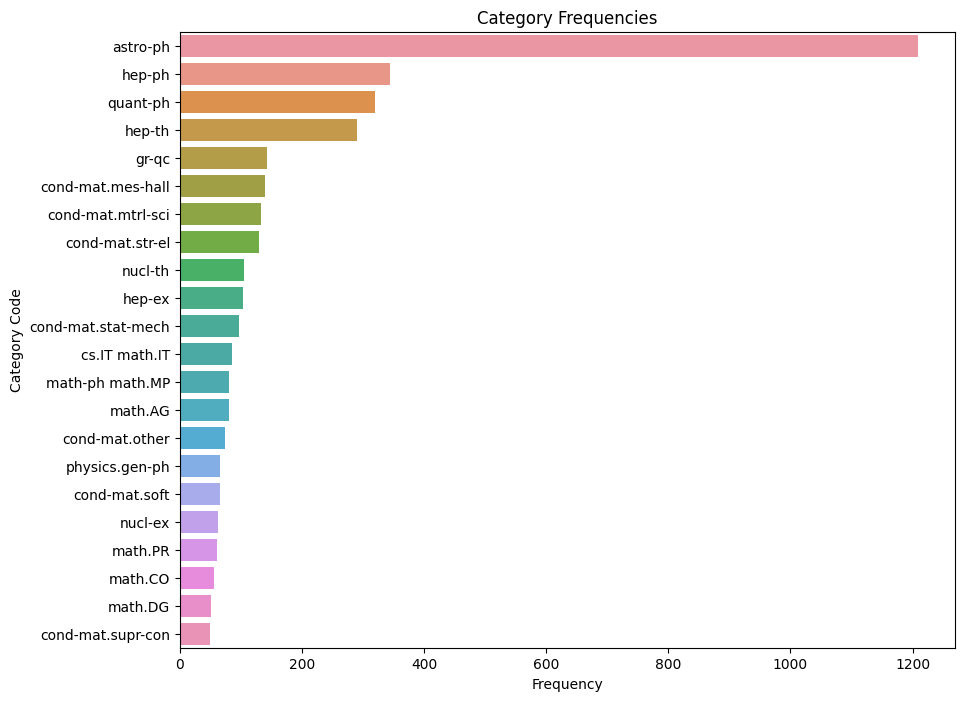

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a pandas DataFrame called 'df'
category_codes = df['categories']
category_counts = category_codes.value_counts()

# Filter out categories with frequency less than 50
category_counts = category_counts[category_counts >= 50]

# Create bar chart with customizations
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(y=category_counts.index, x=category_counts.values, ax=ax)
ax.set_title('Category Frequencies')
ax.set_xlabel('Frequency')
ax.set_ylabel('Category Code')

plt.show()


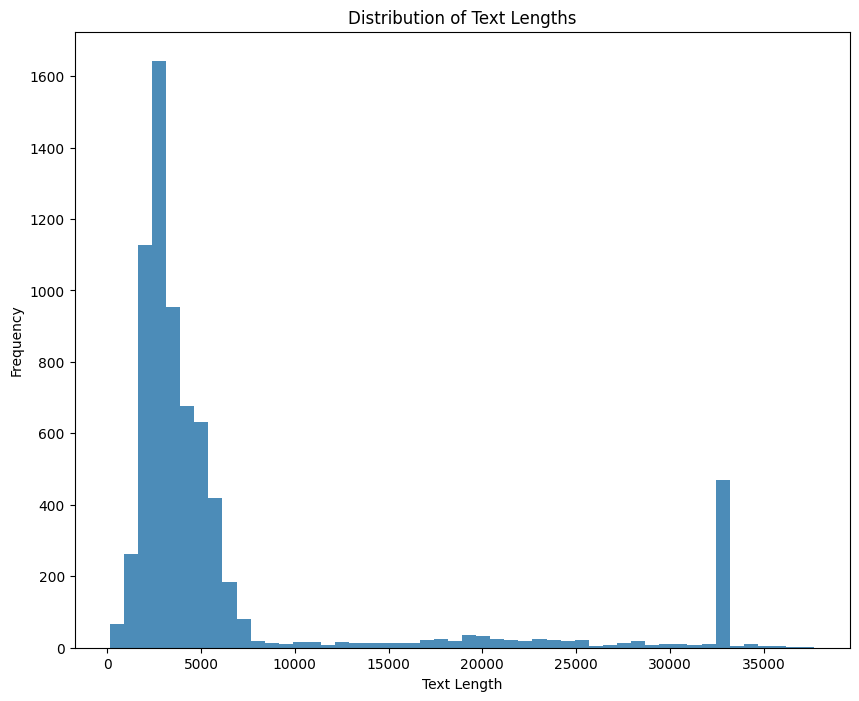

In [10]:
import matplotlib.pyplot as plt

# Assuming your data is stored in a pandas DataFrame called 'df'
text_lengths = df['text_length']

# Create histogram with customizations
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(text_lengths, bins=50, alpha=0.7, color='#005C9A')
ax.set_title('Distribution of Text Lengths')
ax.set_xlabel('Text Length')
ax.set_ylabel('Frequency')

plt.show()


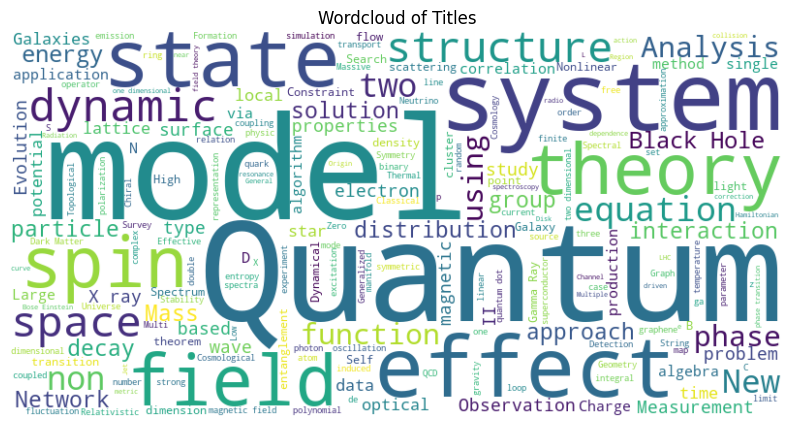

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming your data is stored in a pandas DataFrame called 'df'
titles = df['title'].str.cat(sep=' ')

# Create wordcloud with customizations
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_title('Wordcloud of Titles')
ax.axis('off')

plt.show()


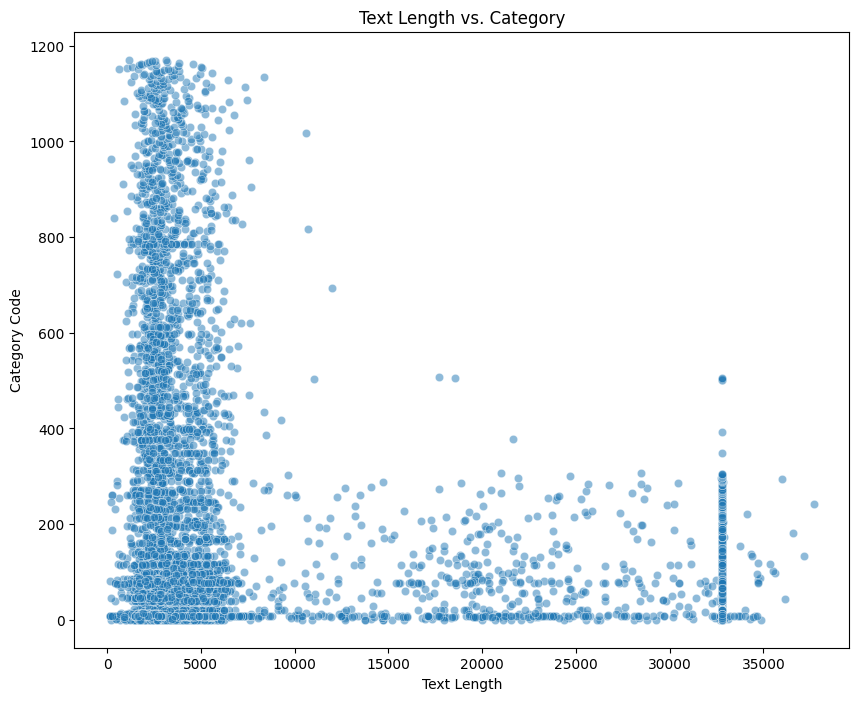

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a pandas DataFrame called 'df'
category_codes = df['category_codes']
text_lengths = df['text_length']

# Create scatter plot with customizations
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=text_lengths, y=category_codes, alpha=0.5, ax=ax)
ax.set_title('Text Length vs. Category')
ax.set_xlabel('Text Length')
ax.set_ylabel('Category Code')

plt.show()


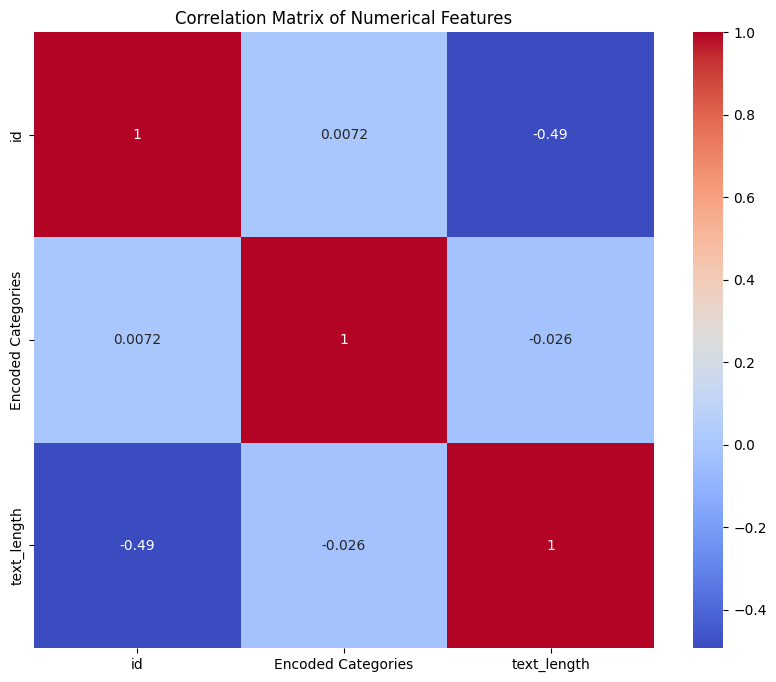

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a pandas DataFrame called 'df'
# Select only numerical columns
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns

# Create correlation matrix
corr_matrix = df1[numerical_columns].corr()

# Create heatmap with customizations
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix of Numerical Features')

plt.show()


# Converting PDFs to Vector Embeddings

# RNN

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import dask.array as da

def rnn(text):
    # Tokenize the text
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts([text])
    sequences = tokenizer.texts_to_sequences([text])

    # Pad sequences
    max_length = max([len(s) for s in sequences])
    padded_sequences = pad_sequences(sequences, maxlen=max_length)

    # Define the RNN model
    model = Sequential()
    model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_length))
    model.add(LSTM(100))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

    # Create dummy target data
    target_data = np.random.rand(padded_sequences.shape[0],1)

    # Fit the model
    model.fit(padded_sequences, target_data, epochs=10, verbose=0,batch_size=32, callbacks=[EarlyStopping(monitor='loss', patience=3)])

    # Get the embedding, flatten it, and convert it to a 1D NumPy array
    embedding = model.get_weights()[0]
    embedding_flat = embedding.flatten()

    return embedding_flat.flatten()


In [ ]:
df['RNN vectors']=df['pdftext'].apply(rnn)

# LSA

In [ ]:
import nltk
from nltk import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD


# Latent Semantic Analysis (LSA)
def lsa(docs):

    vectorizer = CountVectorizer(stop_words='english')
    doc_word = vectorizer.fit_transform(docs)

    # Fit the LSA model
    lsa = TruncatedSVD(n_components=2)
    doc_topic = lsa.fit_transform(doc_word)

    # Show the results

    #print(doc_topic)#Document-Topic Matrix:

    #print(lsa.components_) #LSA Components#used for clustering
    vector=lsa.components_
    return vector.flatten()

def get_sentences(text):
    sentences = nltk.sent_tokenize(text)
    return sentences



df['sentences 2.0']=df['pdftext'].apply(get_sentences)


df['LSA vectors 2.0']=df['sentences 2.0'].apply(lsa)

# Bert !

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.preprocessing import FunctionTransformer
import dask.array as da
import pandas as pd
from tqdm import tqdm

# Load the BERT model and tokenizer
model = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define the maximum length of input text
max_length = 512

# Define a function to encode a single text input
def encode(text):
    # Tokenize the text
    tokens = tokenizer.tokenize(text)
    # Truncate the text if it's longer than the maximum length
    if len(tokens) > max_length:
        tokens = tokens[:max_length]
    # Add the [CLS] and [SEP] tokens
    tokens = ['[CLS]'] + tokens + ['[SEP]']
    # Convert the tokens to input IDs
    input_ids = tokenizer.convert_tokens_to_ids(tokens)
    # Create an attention mask to ignore padded tokens
    attention_mask = [1] * len(input_ids)
    # Pad the input IDs and attention mask to the maximum length
    padding_length = max_length - len(input_ids)
    input_ids = input_ids + ([0] * padding_length)
    attention_mask = attention_mask + ([0] * padding_length)
    # Convert the input IDs and attention mask to PyTorch tensors
    input_ids = torch.tensor(input_ids)
    attention_mask = torch.tensor(attention_mask)
    # Pass the input through the BERT model to get the embedding
    with torch.no_grad():
        model.eval()
        embedding = model(input_ids.unsqueeze(0), attention_mask.unsqueeze(0))[0][0]
    # Convert the embedding to a numpy array and flatten it
    embedding = embedding.detach().numpy().flatten()
    return embedding

# Define a function to encode a list of text inputs
def encode_list(texts):
    # Use Dask to parallelize the encoding process
    embeddings = [da.from_delayed(dask.delayed(encode)(text), shape=(50000,), dtype=float) for text in tqdm(texts)]
    embeddings = da.vstack(embeddings)
    return embeddings


df=pd.read_excel('/home/jovyan/thesis/final2.0.xlsx')

def last(text):

    # Encode the text inputs using the encode_list function
    encoder = FunctionTransformer(encode_list, validate=False)
    embeddings = encoder.transform(text)
    np_array = embeddings.compute()

    # Flatten the NumPy array
    flat_array = np_array.flatten()

    # Print the shape of the flattened array
    #print(flat_array.shape) # Output: (518400,)
    
    return flat_array

df['Bert vectors']=df['pdftext'].apply(last)


# LDA !

In [ ]:
import dask.bag as db
import dask.array as da
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

def lda(sentences):
    # Tokenize the documents
    texts = [doc.split() for doc in sentences]
    # Create the dictionary
    dictionary = Dictionary(texts)
    # Convert the documents into bag-of-words representations
    corpus = [dictionary.doc2bow(text) for text in texts]
    # Train the LDA model
    model = LdaModel(corpus, num_topics=3, id2word=dictionary)
    # Transform the documents into vector representations
    vectors = db.from_sequence(corpus).map(model.__getitem__)
    # Convert the vectors to a Dask array
    vectors = vectors.map(lambda x: [y[1] for y in x]).map(da.from_array)
    # Stack the vectors into a single Dask array
    vectors = da.vstack(vectors)

    np_array = vectors.compute()

    # Flatten the NumPy array
    flat_array = np_array.flatten()

    # Print the shape of the flattened array
    #print(flat_array.shape) # Output: (518400,)
    
    return flat_array

df['LDA vectors']=df['pdftext'].apply(lda)
  

# NMF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import nltk
from nltk import sent_tokenize


def nmf(corpus):

    #corpus = ['this is the first document',          'this document is the second document',          'and this is the third one',          'is this the first document']

    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(corpus)

    nmf = NMF(n_components=3, init='random', random_state=0)
    W = nmf.fit_transform(X)

    return W.flatten()

df['NMF vectors']=df['sentences'].apply(nmf)

# Regression Model for accesing its usage for downstream tasks 

# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the encoder to the category column and transform the values
encoded_categories = encoder.fit_transform(df['categories'])

# Replace the category column in the DataFrame with the encoded values
df['Encoded Categories'] = encoded_categories

# Scoring 

## RNN vectors

In [57]:
df.shape

(6960, 15)

In [58]:
df.head(5)

,id,title,categories,Encoded Categories,pdf_links,pdftext,text_length,tokens,cleaned_tokens,stemmed_tokens,lemmatized_tokens,language,sentences,RNN vectors,LSA vectors
1,704.0002,Sparsity-certifying Graph Decompositions,math.CO cs.CG,561,https://arxiv.org/pdf/0704.0002.pdf,Sparsity-certifying Graph Decompositions\nIlea...,33121,"['Sparsity-certifying', 'Graph', 'Decompositio...","['graph', 'decompositions', 'ileana', 'louis',...","['graph', 'decomposit', 'ileana', 'loui', 'com...","['graph', 'decomposition', 'ileana', 'louis', ...",en,[Sparsity-certifying Graph Decompositions\nIle...,"[0.013712313, -0.0367475748, 0.03766248, -0.02...","[0.0143767267, 0.000988273, 0.0143767267, 0.01..."
2,704.0003,The evolution of the Earth-Moon system based o...,physics.gen-ph,984,https://arxiv.org/pdf/0704.0003.pdf,The evolution of the Ear th-Moon system based ...,31232,"['The', 'evolution', 'of', 'the', 'Ear', 'th-M...","['evolution', 'ear', 'system', 'based', 'dark'...","['evolut', 'ear', 'system', 'base', 'dark', 'm...","['evolution', 'ear', 'system', 'based', 'dark'...",en,[The evolution of the Ear th-Moon system based...,"[-0.039867483100000004, 0.0259359218, 1.57841e...","[0.0004590884, 0.0101714478, 0.0101714478, 0.0..."
3,704.0004,A determinant of Stirling cycle numbers counts...,math.CO,560,https://arxiv.org/pdf/0704.0004.pdf,arXiv:0704.0004v1 [math.CO] 31 Mar 2007A Det...,18312,"['arXiv:0704.0004v1', '[', 'math.CO', ']', '31...","['mar', 'determinant', 'stirling', 'cycle', 'n...","['mar', 'determin', 'stirl', 'cycl', 'number',...","['mar', 'determinant', 'stirling', 'cycle', 'n...",en,[arXiv:0704.0004v1 [math.CO] 31 Mar 2007A De...,"[-0.0340844765, -0.0400714166, 0.0251507498, 0...","[4.5672000000000006e-05, 4.5672000000000006e-0..."
4,704.0005,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,math.CA math.FA,554,https://arxiv.org/pdf/0704.0005.pdf,arXiv:0704.0005v1 [math.CA] 2 Apr 2007FROM D...,16817,"['arXiv:0704.0005v1', '[', 'math.CA', ']', '2'...","['apr', 'dyadic', 'λαtoλα', 'wael', 'alberto',...","['apr', 'dyadic', 'λαtoλα', 'wael', 'alberto',...","['apr', 'dyadic', 'λαtoλα', 'wael', 'alberto',...",en,[arXiv:0704.0005v1 [math.CA] 2 Apr 2007FROM ...,"[0.0372919776, 0.038389992000000005, -0.019792...","[0.0020720194, 0.0020720194, 0.0007857609, 0.0..."
5,704.0006,Bosonic characters of atomic Cooper pairs acro...,cond-mat.mes-hall,43,https://arxiv.org/pdf/0704.0006.pdf,arXiv:0704.0006v1 [cond-mat.mes-hall] 31 Mar...,22819,"['arXiv:0704.0006v1', '[', 'cond-mat.mes-hall'...","['mar', 'characters', 'atomic', 'cooper', 'pai...","['mar', 'charact', 'atom', 'cooper', 'pair', '...","['mar', 'character', 'atomic', 'cooper', 'pair...",en,[arXiv:0704.0006v1 [cond-mat.mes-hall] 31 Ma...,"[-0.0373473763, 0.042221400900000004, -0.04965...","[0.00033781260000000004, 0.001231906, 0.000213..."


In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, f1_score

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

X = df['RNN vectors'].to_list() 
y = df['Encoded Categories'].to_list() 

max_len = max(len(x) for x in X)# Fix Shape
X = np.array([np.concatenate([x, [0] * (max_len - len(x))]) for x in X])

features = X
target = y

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred_rnn = rf.predict(X_test)
f1score_rnn = f1_score(y_test, y_pred_rnn, average='weighted')
print(f"F1-score: {f1score_rnn}")

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rnn)
print("Confusion matrix:")
print(cm)

In [ ]:
# Calculate accuracy
acc = accuracy_score(y_test, y_pred_rnn)
print(f"Accuracy: {acc}")

In [ ]:
# Calculate ROC curve and ROC AUC score
y_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC curve:")
print(fpr, tpr)
print(f"ROC AUC score: {roc_auc}")

## LSA vectors

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

X = df['LSA vectors'].to_list()  # Features (PDF document vectors)
y = df['Encoded Categories'].to_list()  # Target variable (categories)

# Fix Shape as vectors are of different shapes
max_len = max(len(x) for x in X)
X = np.array([np.concatenate([x, [0] * (max_len - len(x))]) for x in X])

features = X
target = y

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred_lsa = rf.predict(X_test)
f1score_lsa = f1_score(y_test, y_pred_lsa, average='weighted')
print(f"F1-score: {f1score_lsa}")


## NMF vectors

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

X = df['NMF vectors'].to_list() 
y = df['Encoded Categories'].to_list()  

max_len = max(len(x) for x in X) # Fix Shape 
X = np.array([np.concatenate([x, [0] * (max_len - len(x))]) for x in X])

features = X
target = y

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred_nmf = rf.predict(X_test)
f1score_nmf = f1_score(y_test, y_pred_nmf, average='weighted')
print(f"F1-score: {f1score_nmf}")